In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy
import pylab 
import scipy.stats as stats
import seaborn as sns
from sklearn import datasets
from scipy import stats
import os
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
os.getcwd()
sns.set(rc={'figure.figsize':(20,10)})

In [ ]:
#Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout



In [ ]:
data = pd.read_csv("/content/Flight_delay.csv")
data.columns

Index(['DayOfWeek', 'Date', 'DepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'Airline', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Org_Airport', 'Dest', 'Dest_Airport', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Data Dictionary
DayOfWeek → 1 (Monday) - 7 (Sunday)
Date → Scheduled date
DepTime → Actual departure time (local, hhmm)
ArrTime → Actual arrival time (local, hhmm)
CRSArrTime → Scheduled arrival time (local, hhmm)
UniqueCarrier → Unique carrier code
Airline → Airline company
FlightNum → flight number
TailNum → plane tail number
ActualElapsedTime → Actual time an airplane spends in the air(in minutes) with TaxiIn/Out
CRSElapsedTime → CRS Elapsed Time of Flight (estimated elapse time), in minutes
AirTime → Flight Time (in minutes)
ArrDelay → Difference in minutes between scheduled and actual arrival time
Origin → Origin IATA(International Air Transport Association) airport code
Org_Airport → Origin Airport Name
Dest → Destination IATA code
Dest_Airport → Destination Airport Name
Distance → Distance between airports (miles)
TaxiIn → Wheels down and arrival at the destination airport gate, in minutes
TaxiOut → The time elapsed between departure from the origin airport gate and wheels off, in minutes
Cancelled → Was the flight canceled?
CancellationCode → Reason for cancellation
Diverted → 1 = yes, 0 = no
CarrierDelay → Flight delay due to carrier(e.g. maintenance or crew problems, aircraft cleaning, fueling, etc), 0 = No, yes = (in minutes)
WeatherDelay → Flight delay due to weather, 0 = No, yes = (in minutes)
NASDelay → Flight delay by NSA(National Aviation System), 0 = No, yes = (in minutes)
SecurityDelay → Flight delay by this reason, 0 = No, yes = (in minutes)
LateAircraftDelay → Flight delay by this reason, 0 = No, yes = (in minutes)

In [ ]:
data.info()
# org_airport dan dest_airport memiliki beberapa missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152812 entries, 0 to 152811
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DayOfWeek          152812 non-null  int64  
 1   Date               152812 non-null  object 
 2   DepTime            152812 non-null  int64  
 3   ArrTime            152812 non-null  int64  
 4   CRSArrTime         152812 non-null  int64  
 5   UniqueCarrier      152812 non-null  object 
 6   Airline            152812 non-null  object 
 7   FlightNum          152812 non-null  int64  
 8   TailNum            152811 non-null  object 
 9   ActualElapsedTime  152811 non-null  float64
 10  CRSElapsedTime     152811 non-null  float64
 11  AirTime            152811 non-null  float64
 12  ArrDelay           152811 non-null  float64
 13  DepDelay           152811 non-null  float64
 14  Origin             152811 non-null  object 
 15  Org_Airport        152380 non-null  object 
 16  De

In [ ]:
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,152802,152803,152804,152805,152806,152807,152808,152809,152810,152811
DayOfWeek,4,4,4,4,4,4,4,4,4,4,...,5,1,2,4,5,7,3,5,2,3
Date,03-01-2019,03-01-2019,03-01-2019,03-01-2019,03-01-2019,03-01-2019,03-01-2019,03-01-2019,03-01-2019,03-01-2019,...,15-02-2019,18-02-2019,19-02-2019,21-02-2019,22-02-2019,24-02-2019,27-02-2019,01-02-2019,05-02-2019,06-02-2019
DepTime,1829,1937,1644,1452,1323,1416,1657,1422,2107,1812,...,1828,1828,1857,1912,1818,1752,1819,1657,1512,1606
ArrTime,1959,2037,1845,1640,1526,1512,1754,1657,2334,1927,...,1919,1912,1944,2020,1927,1854,1909,1901,1717,1810
CRSArrTime,1925,1940,1725,1625,1510,1435,1735,1610,2230,1815,...,1835,1835,1835,1835,1835,1835,1835,1640,1640,1640
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,...,MQ,MQ,MQ,MQ,MQ,MQ,MQ,MQ,MQ,MQ
Airline,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,Southwest Airlines Co.,...,American Eagle Airlines Inc.,American Eagle Airlines Inc.,American Eagle Airlines Inc.,American Eagle Airlines Inc.,American Eagle Airlines Inc.,American Eagle Airlines Inc.,American Eagle Airlines Inc.,American Eagle Airlines Inc.,American Eagle Airlines Inc.,American Eagle Airlines Inc.
FlightNum,3920,509,1333,675,4,54,623,188,362,422,...,4246,4246,4246,4246,4246,4246,4246,4247,4247,4247
TailNum,N464WN,N763SW,N334SW,N286WN,N674AA,N643SW,N724SW,N215WN,N798SW,N779SW,...,N641AE,N646AE,N637AE,N638AE,N652RS,N689EC,N613AE,N828AE,N836AE,NaN
ActualElapsedTime,90.0,240.0,121.0,228.0,123.0,56.0,57.0,155.0,147.0,135.0,...,51.0,44.0,47.0,68.0,69.0,62.0,50.0,124.0,125.0,NaN


In [ ]:
data.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90.0,...,3.0,10.0,0.0,N,0.0,2.0,0.0,0.0,0.0,32.0
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240.0,...,3.0,7.0,0.0,N,0.0,10.0,0.0,0.0,0.0,47.0
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121.0,...,6.0,8.0,0.0,N,0.0,8.0,0.0,0.0,0.0,72.0
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228.0,...,7.0,8.0,0.0,N,0.0,3.0,0.0,0.0,0.0,12.0
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123.0,...,4.0,9.0,0.0,N,0.0,0.0,0.0,0.0,0.0,16.0


In [ ]:
data.describe()

,DayOfWeek,DepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000,484551.0,484551.0,484551.000000,484551.000000,484551.000000,484551.000000,484551.000000
mean,3.991605,1564.477865,1617.784438,1652.129929,2139.207386,134.810422,131.400761,108.877134,60.907764,57.498086,752.142689,6.782413,19.150876,0.0,0.0,17.419440,3.153284,13.599421,0.082033,26.653587
std,1.971466,452.235219,583.637660,466.096216,1812.677071,74.070374,71.542531,70.113513,56.975420,55.991012,571.631124,5.555816,15.309747,0.0,0.0,39.417893,19.503657,31.454655,1.884774,40.535994
min,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,-21.000000,0.000000,15.000000,6.000000,31.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1234.000000,1327.000000,1339.000000,629.000000,80.000000,79.000000,57.000000,25.000000,23.000000,331.000000,4.000000,11.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1620.000000,1737.000000,1723.000000,1514.000000,116.000000,114.000000,90.000000,42.000000,40.000000,599.000000,5.000000,15.000000,0.0,0.0,2.000000,0.000000,1.000000,0.000000,13.000000
75%,6.000000,1928.000000,2049.000000,2025.000000,3683.000000,168.000000,162.000000,139.000000,76.000000,72.000000,992.000000,8.000000,22.000000,0.0,0.0,19.000000,0.000000,13.000000,0.000000,36.000000
max,7.000000,2400.000000,2400.000000,2359.000000,8403.000000,727.000000,602.000000,609.000000,1707.000000,1710.000000,4502.000000,207.000000,383.000000,0.0,0.0,1707.000000,1148.000000,1357.000000,392.000000,1254.000000


In [ ]:
(data ['ArrTime'])

0         1959
1         2037
2         1845
3         1640
4         1526
          ... 
152807    1854
152808    1909
152809    1901
152810    1717
152811    1810
Name: ArrTime, Length: 152812, dtype: int64

In [ ]:
(data['DepTime'])

0         1829
1         1937
2         1644
3         1452
4         1323
          ... 
152807    1752
152808    1819
152809    1657
152810    1512
152811    1606
Name: DepTime, Length: 152812, dtype: int64

In [ ]:
data.isnull().sum()
print(data["Org_Airport"].isnull().sum() / data["Org_Airport"].count(), data["Dest_Airport"].isnull().sum() / data["Dest_Airport"].count())
#Org_Airport dan Dest_Airport memiliki sedikit missing value
#namun kita bisa gunakan kolom "Origin" dan "Dest" untuk menggantikan kedua kolom tersebut
isnull = data["Org_Airport"].isnull()
for i, s in enumerate(isnull):
    if(isnull[i]):
        print(i)
        
print(data["Org_Airport"][17166])


0.002434967540662096 0.0030616554054054054
17166
17169
17170
17622
18049
18052
18056
18064
18177
18318
18342
18428
18435
18438
18446
18450
18453
18456
18458
18548
18920
18957
19031
19033
19040
19043
19050
19053
19057
19059
19070
19256
19257
19313
19410
19642
19749
19751
19765
19767
19769
20051
20281
20294
20295
20713
20715
20724
20726
20730
20918
20919
21007
21117
21123
21124
21127
21132
21219
21387
21390
21393
21394
21405
21685
21694
21696
21701
21772
21858
22430
22436
22439
22442
22445
22453
22529
22583
22612
22614
22627
22636
22637
23124
23496
23502
23575
23695
23973
24258
24330
24332
24337
24341
24342
24345
24349
24354
24562
24669
24943
24946
24949
24954
24958
24961
24963
25199
25302
25370
25467
25469
25472
25473
25476
25482
25486
25491
25651
25736
25841
25866
25964
25966
25972
25978
25982
25985
25992
26095
26186
26273
26314
26356
26361
26362
26365
26367
26369
26372
26492
26585
26652
26666
26676
26679
26681
26686
26940
27016
27021
27027
27030
27033
27046
27055
27064
27161
27287
275

In [ ]:
#mencari kolom yang bisa didrop karena hanya memiliki satu value
for col in data.columns:
    if(len(data[col].unique())==1):
        print(col)
        


Cancelled
CancellationCode
Diverted


In [ ]:
data.drop(["Cancelled", "CancellationCode", "Diverted", "Org_Airport", "Dest_Airport"], axis=1, inplace=True)

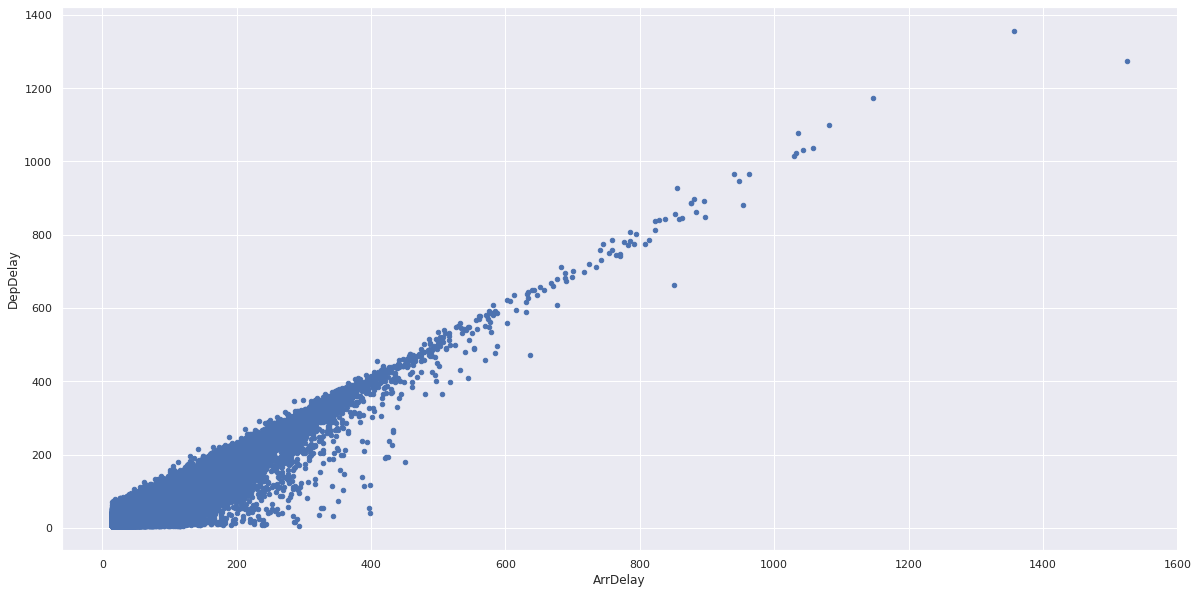

In [ ]:
data.plot(kind= 'scatter', x= 'ArrDelay', y ='DepDelay' )
plt.show()

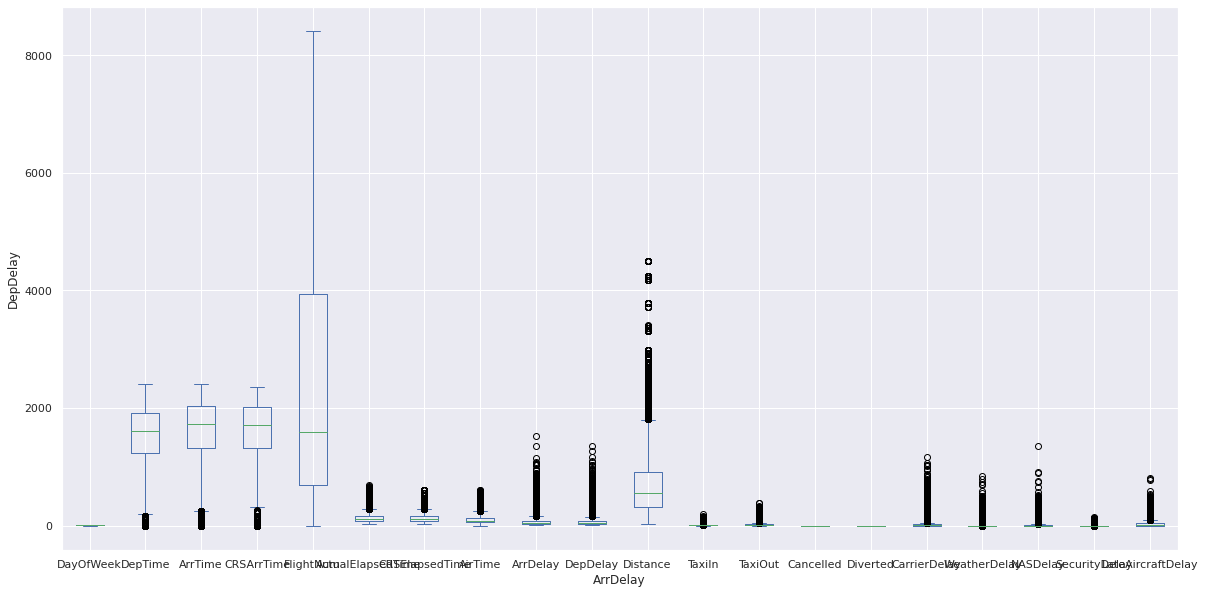

In [ ]:
#matplotlib
data.plot(kind='box')
plt.xlabel('ArrDelay')
plt.ylabel('DepDelay')
plt.show()

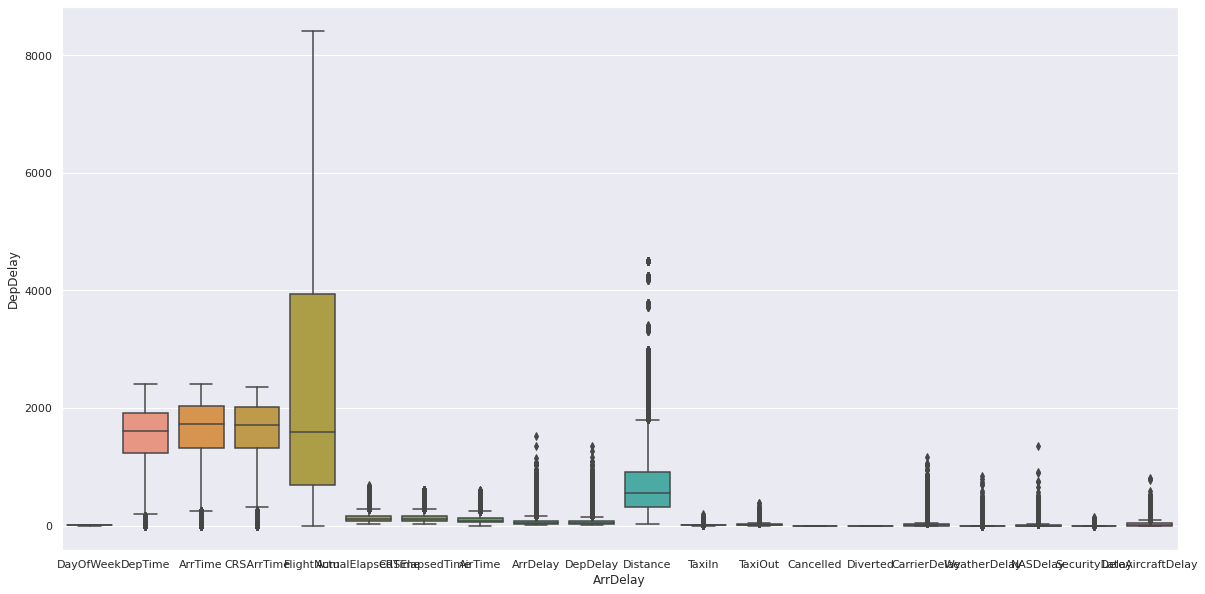

In [ ]:
#seaborn
sns.boxplot(data=data)
plt.xlabel('ArrDelay')
plt.ylabel('DepDelay')
plt.show()

In [ ]:
data["TotalDelay"] = data["LateAircraftDelay"] + data["SecurityDelay"] + data["NASDelay"] + data["WeatherDelay"] + data["CarrierDelay"]
#membuat kolom total delay

dates = data["Date"].str.split("-", expand=True)
data["Month"] = dates[1].astype(int)
data["Year"] = dates[2]

print(data["Year"].unique())
#data hanya dari tahun 2019

print(data["Month"].unique())
#data hanya dari bulan 1 sampai 6


['2019']
[1 2 3 4 5 6]


In [ ]:
print(np.any((data["LateAircraftDelay"] + data["SecurityDelay"] + data["NASDelay"] + data["WeatherDelay"] + data["CarrierDelay"])==0))
#Table hanya mengandung data pesawat yang terdelay

False


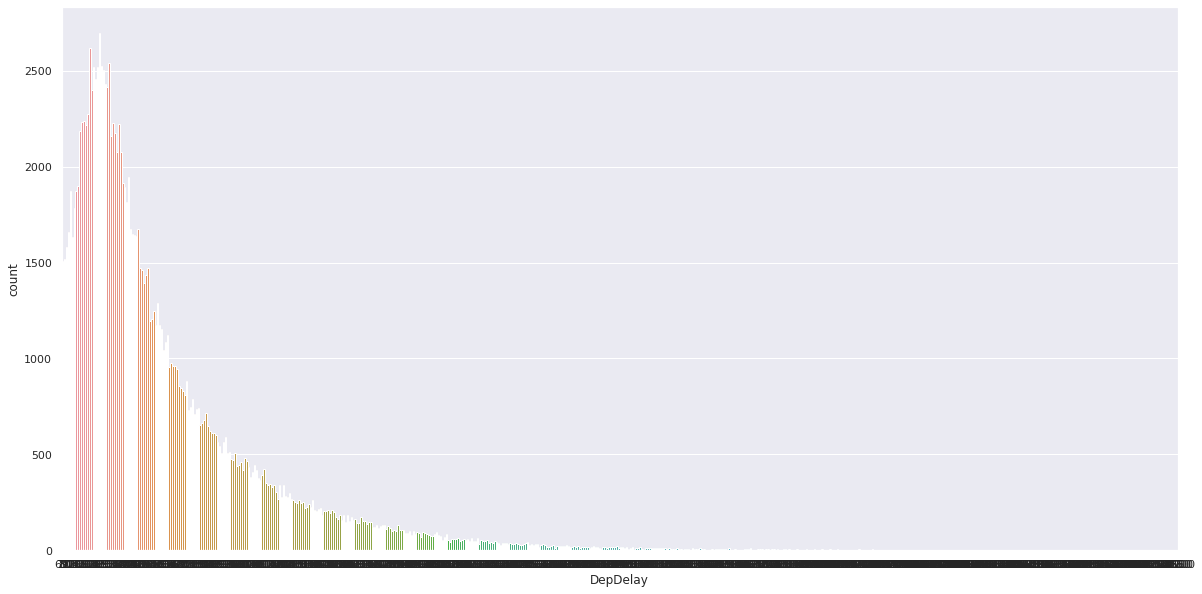

In [ ]:
sns.countplot(x='DepDelay', data=data)
plt.show()

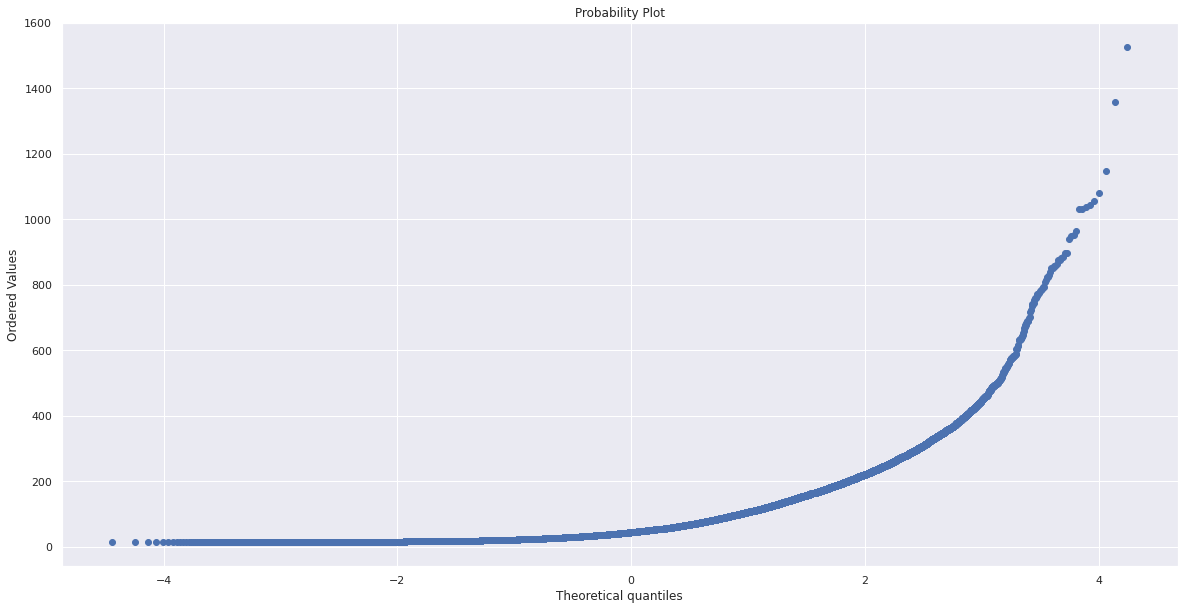

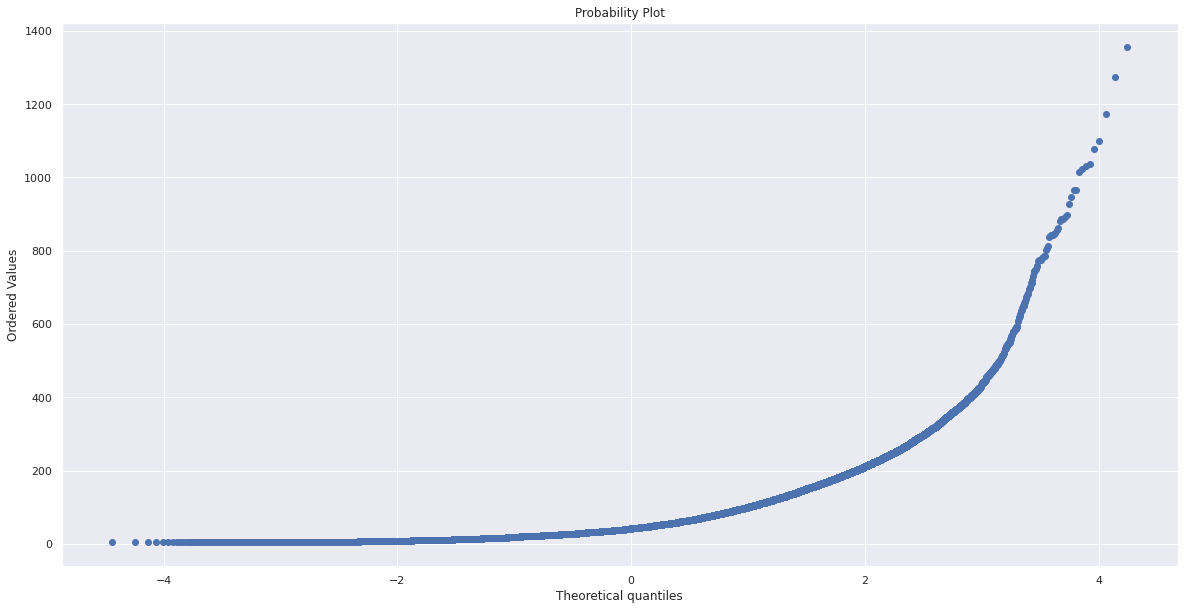

In [ ]:
x= data['ArrDelay']
y= data['DepDelay']
stats.probplot(x,dist="norm", plot=pylab)
pylab.show()
stats.probplot(y, dist="norm", plot=pylab)
pylab.show()

In [ ]:
data.isnull().any()

DayOfWeek            False
Date                 False
DepTime              False
ArrTime              False
CRSArrTime           False
UniqueCarrier        False
Airline              False
FlightNum            False
TailNum               True
ActualElapsedTime     True
CRSElapsedTime        True
AirTime               True
ArrDelay              True
DepDelay              True
Origin                True
Org_Airport           True
Dest                  True
Dest_Airport          True
Distance              True
TaxiIn                True
TaxiOut               True
Cancelled             True
CancellationCode      True
Diverted              True
CarrierDelay          True
WeatherDelay          True
NASDelay              True
SecurityDelay         True
LateAircraftDelay     True
dtype: bool

In [ ]:
data.loc[1:10]

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240.0,...,3.0,7.0,0.0,N,0.0,10.0,0.0,0.0,0.0,47.0
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121.0,...,6.0,8.0,0.0,N,0.0,8.0,0.0,0.0,0.0,72.0
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228.0,...,7.0,8.0,0.0,N,0.0,3.0,0.0,0.0,0.0,12.0
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123.0,...,4.0,9.0,0.0,N,0.0,0.0,0.0,0.0,0.0,16.0
5,4,03-01-2019,1416,1512,1435,WN,Southwest Airlines Co.,54,N643SW,56.0,...,2.0,5.0,0.0,N,0.0,12.0,0.0,0.0,0.0,25.0
6,4,03-01-2019,1657,1754,1735,WN,Southwest Airlines Co.,623,N724SW,57.0,...,5.0,5.0,0.0,N,0.0,7.0,0.0,0.0,0.0,12.0
7,4,03-01-2019,1422,1657,1610,WN,Southwest Airlines Co.,188,N215WN,155.0,...,6.0,6.0,0.0,N,0.0,40.0,0.0,0.0,0.0,7.0
8,4,03-01-2019,2107,2334,2230,WN,Southwest Airlines Co.,362,N798SW,147.0,...,6.0,7.0,0.0,N,0.0,5.0,0.0,0.0,0.0,59.0
9,4,03-01-2019,1812,1927,1815,WN,Southwest Airlines Co.,422,N779SW,135.0,...,6.0,11.0,0.0,N,0.0,3.0,0.0,0.0,0.0,69.0
10,4,03-01-2019,1326,1559,1530,WN,Southwest Airlines Co.,1056,N459WN,153.0,...,5.0,5.0,0.0,N,0.0,0.0,0.0,0.0,0.0,29.0


In [ ]:
data.iloc[1:10]

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240.0,...,3.0,7.0,0.0,N,0.0,10.0,0.0,0.0,0.0,47.0
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121.0,...,6.0,8.0,0.0,N,0.0,8.0,0.0,0.0,0.0,72.0
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228.0,...,7.0,8.0,0.0,N,0.0,3.0,0.0,0.0,0.0,12.0
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123.0,...,4.0,9.0,0.0,N,0.0,0.0,0.0,0.0,0.0,16.0
5,4,03-01-2019,1416,1512,1435,WN,Southwest Airlines Co.,54,N643SW,56.0,...,2.0,5.0,0.0,N,0.0,12.0,0.0,0.0,0.0,25.0
6,4,03-01-2019,1657,1754,1735,WN,Southwest Airlines Co.,623,N724SW,57.0,...,5.0,5.0,0.0,N,0.0,7.0,0.0,0.0,0.0,12.0
7,4,03-01-2019,1422,1657,1610,WN,Southwest Airlines Co.,188,N215WN,155.0,...,6.0,6.0,0.0,N,0.0,40.0,0.0,0.0,0.0,7.0
8,4,03-01-2019,2107,2334,2230,WN,Southwest Airlines Co.,362,N798SW,147.0,...,6.0,7.0,0.0,N,0.0,5.0,0.0,0.0,0.0,59.0
9,4,03-01-2019,1812,1927,1815,WN,Southwest Airlines Co.,422,N779SW,135.0,...,6.0,11.0,0.0,N,0.0,3.0,0.0,0.0,0.0,69.0


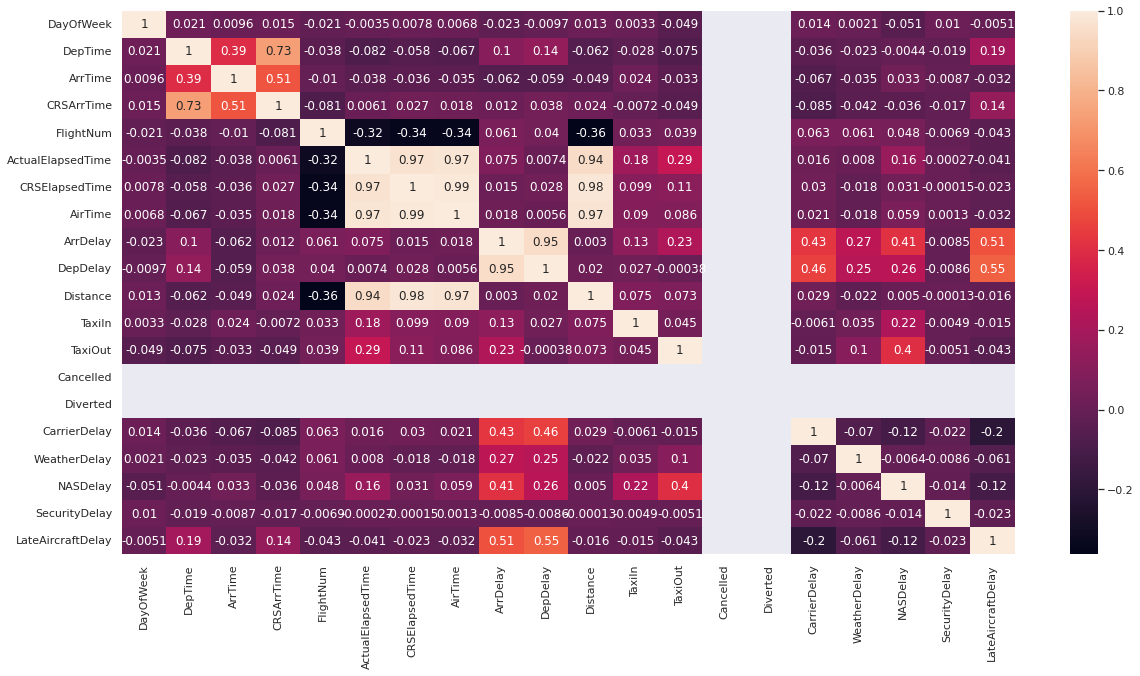

In [ ]:
sns.heatmap(data=data.corr(), annot = True)
plt.show()

<AxesSubplot:>

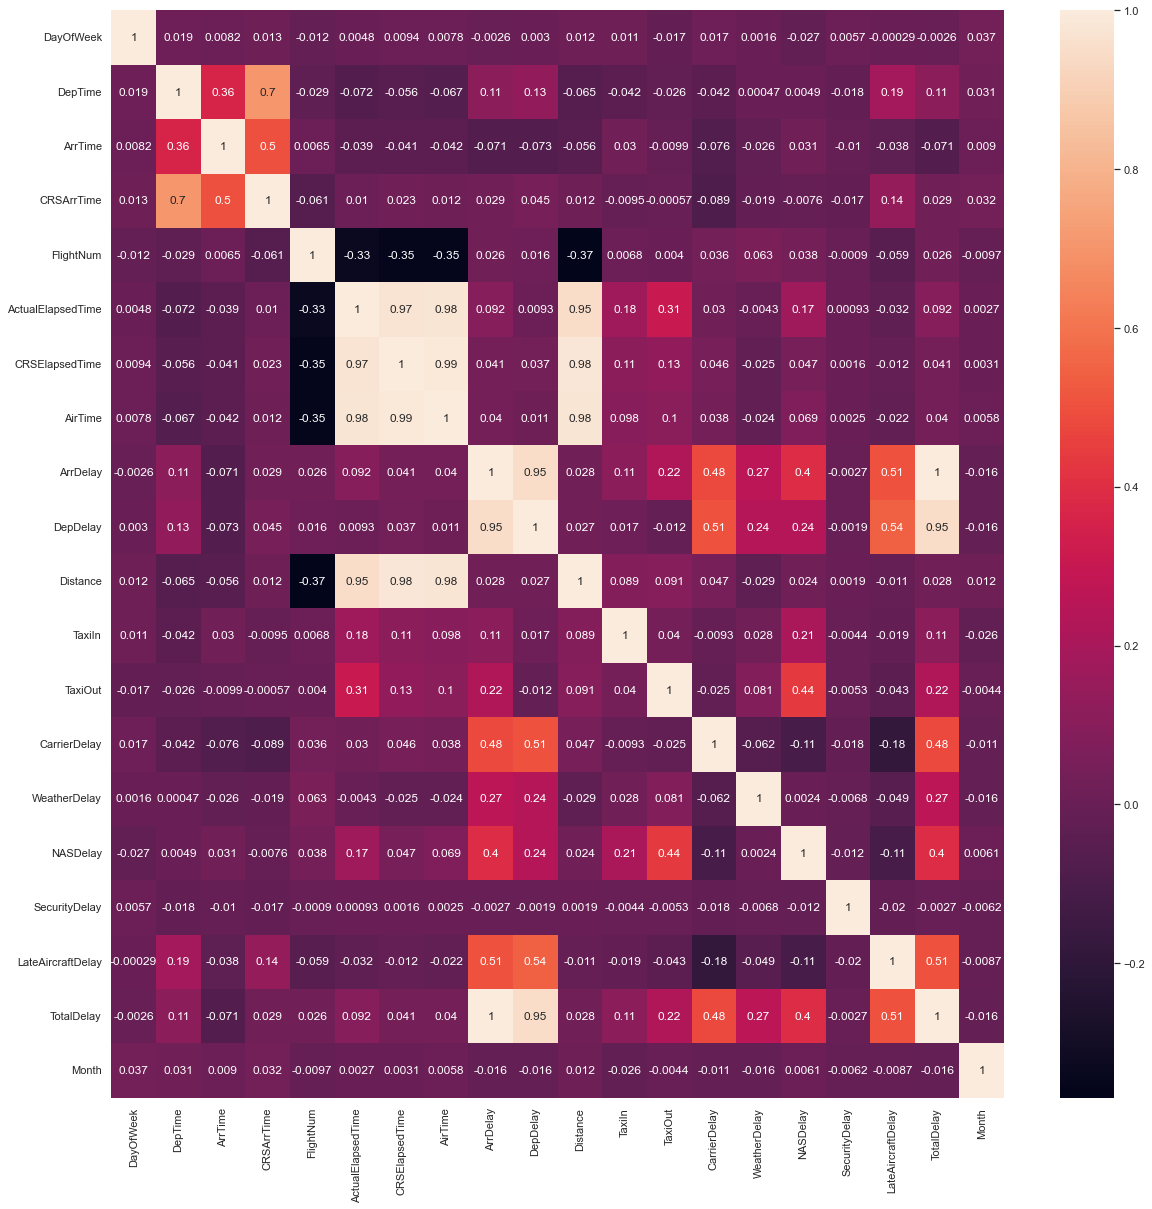

In [ ]:
plt.subplots(figsize=(20,20))
corr_mat = data.corr()
sns.heatmap(corr_mat, annot=True)

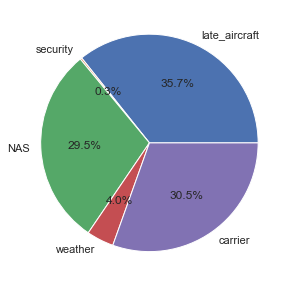

In [ ]:
#Perbandingan kontributor delay
delay_contribution_count = {
    "late_aircraft":data[data["LateAircraftDelay"]>0]["LateAircraftDelay"].count(),
    "security":data[data["SecurityDelay"]>0]["SecurityDelay"].count(),
    "NAS":data[data["NASDelay"]>0]["NASDelay"].count(),
    "weather":data[data["WeatherDelay"]>0]["WeatherDelay"].count(),
    "carrier":data[data["CarrierDelay"]>0]["CarrierDelay"].count()
}
plt.subplots(figsize=(5,5))
plt.pie(delay_contribution_count.values(), labels=delay_contribution_count.keys(), autopct='%.1f%%')
plt.show()

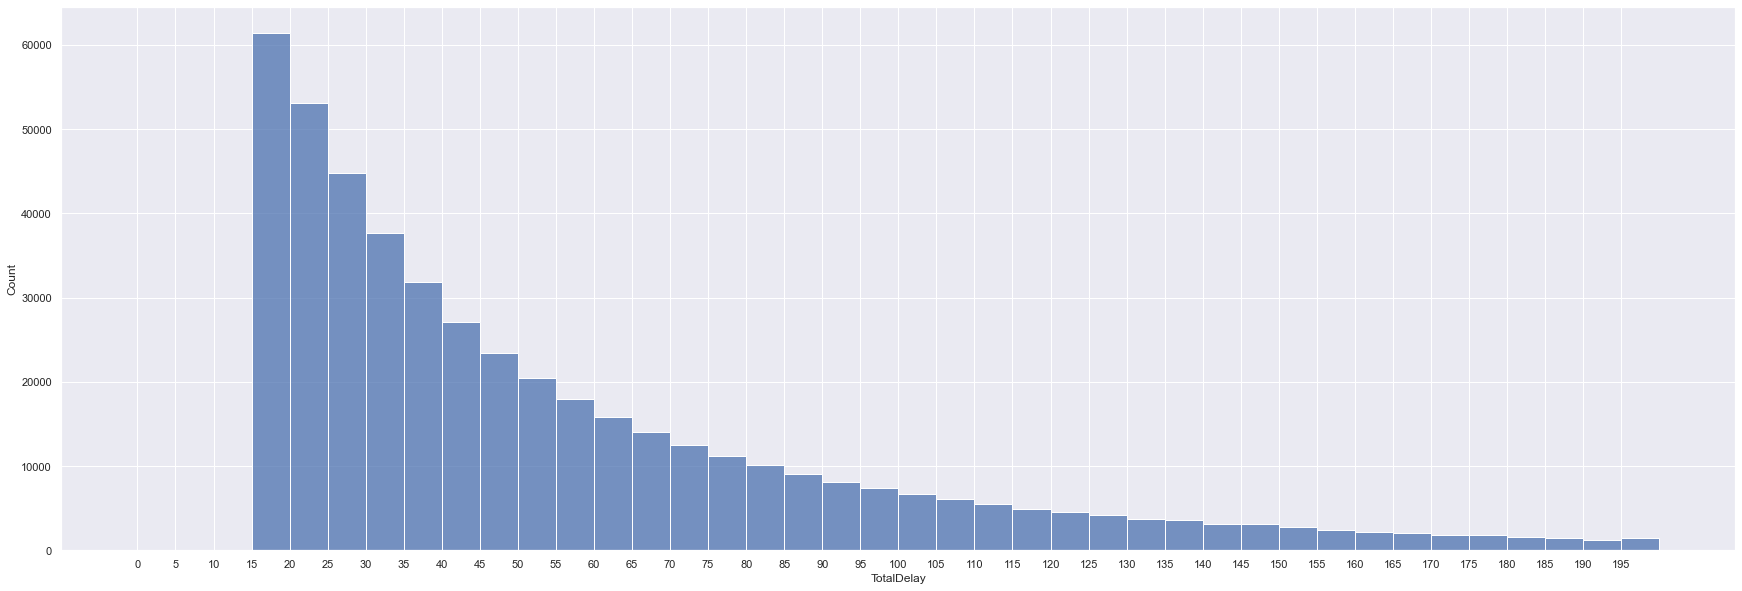

In [ ]:
#Distribusi total delay
fig, ax = plt.subplots(figsize=(30, 10))
bins = np.histogram_bin_edges(data["TotalDelay"], bins=40, range=(0, 200))
p = sns.histplot(data["TotalDelay"], bins=bins)
p.set_xticks(range(0, 200, 5))
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[69221.57142857143, 69221.57142857143, 69221.57142857143, 69221.57142857143, 69221.57142857143, 69221.57142857143, 69221.57142857143]


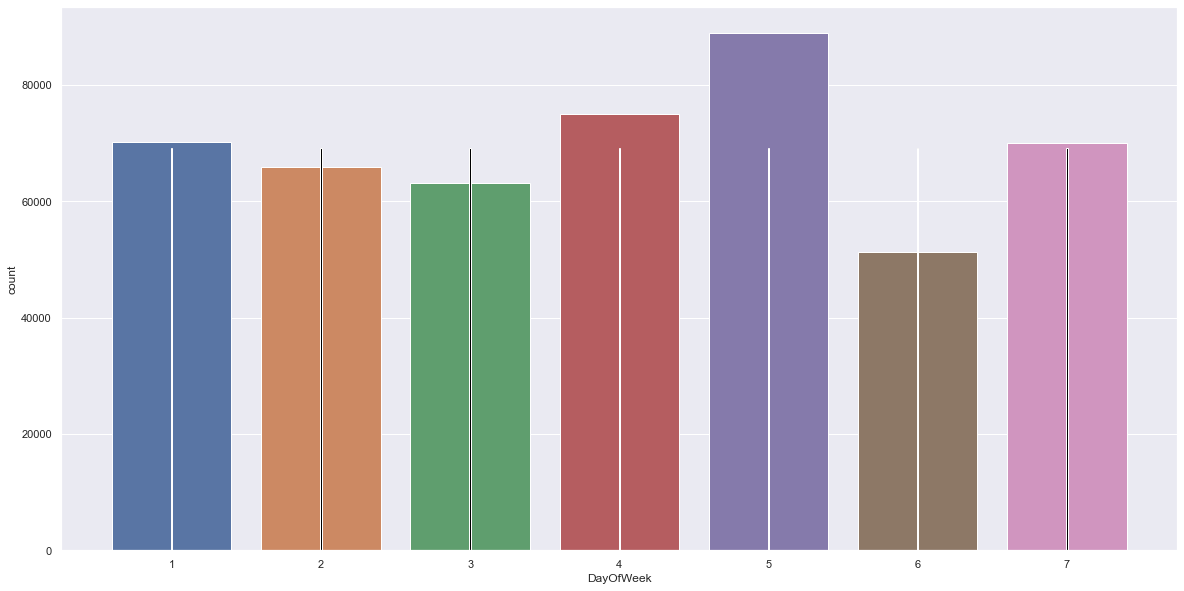

In [ ]:
col = "DayOfWeek"
DayOfWeek_DelayCount_observed = data.groupby(["DayOfWeek"]).count()["Date"]
DayOfWeek_DelayCount_expected = [sum(observed)/len(observed) for _ in range(len(observed))] #we expect a uniform distribution of amount of delay
sns.countplot(data[col])
print(expected)
plt.bar(x=[i for i in range(7)], height=expected, color="black", width=0.01)
plt.show()

In [ ]:
#chi square goodness of fit test to see if the variation of delay counts throughout days of the week is due to random chance or not
print(DayOfWeek_DelayCount_observed)
print(DayOfWeek_DelayCount_expected)

#null hypothesis = there is no significant difference between the observed data and the expecred data
stat, p = stats.chisquare(DayOfWeek_DelayCount_observed, f_exp=DayOfWeek_DelayCount_expected)
print(stat, p) 
#we use alpha = 0.05
#p value is small enough so observed data is significantly different from expected value
#The day of the week has an influence on the number of delays

DayOfWeek
1    70254
2    65934
3    63055
4    75011
5    88972
6    51330
7    69995
Name: Date, dtype: int64
[69221.57142857143, 69221.57142857143, 69221.57142857143, 69221.57142857143, 69221.57142857143, 69221.57142857143, 69221.57142857143]
11473.360880485232 0.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<BarContainer object of 6 artists>

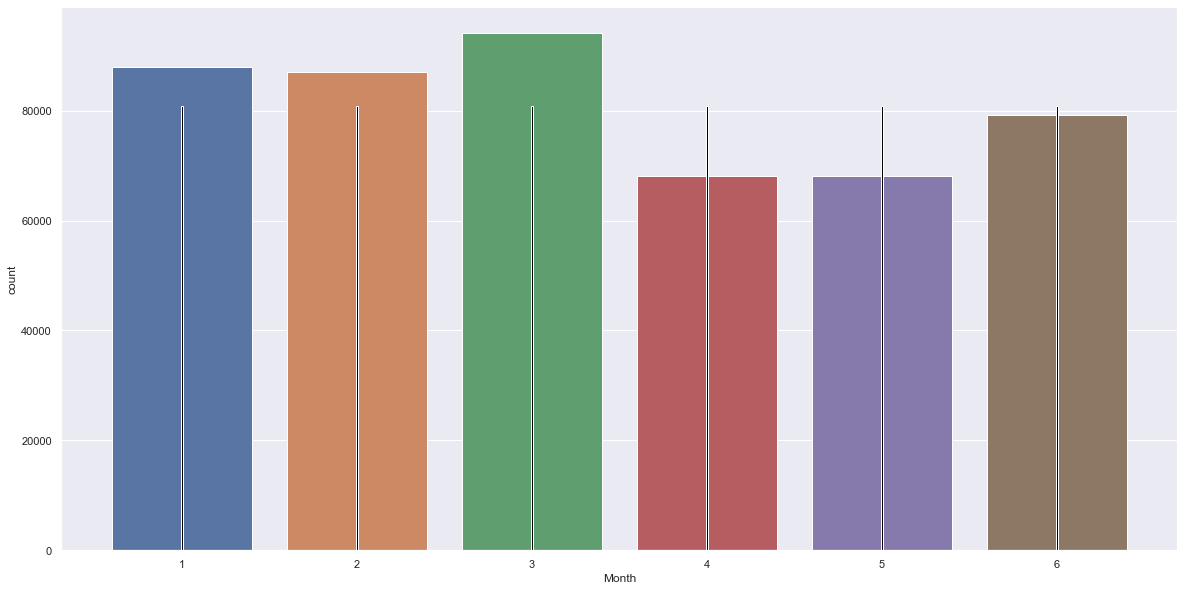

In [ ]:
Month_DelayCount_observed = data.groupby("Month").count()["Date"]
Month_DelayCount_expected = [sum(Month_DelayCount_observed)/len(Month_DelayCount_observed) for _ in range(len(Month_DelayCount_observed))]

sns.countplot(data["Month"])
plt.bar(x=[i for i in range(len(Month_DelayCount_expected))], height=Month_DelayCount_expected, width=0.01, color="black")

In [ ]:
stat, p = stats.chisquare(Month_DelayCount_observed, f_exp=Month_DelayCount_expected)
print(stat, p)

7331.325389897039 0.0
